# DE data interface

Convert trajectory data between .csv and .mat. The .csv data are pandas dataframe with (x, y, frame, particle), which is compatible with `trackpy` convention. During the collaboration with Cristian, it is handy to have also .mat files, where the parameters are embedded, e.g. (X, Y, fps, OD, ro, ri). All length should be in microns, so that we don't have to specify pixel size. 

Here I implement the data interface.

In [41]:
import pandas as pd
from scipy.io import savemat, loadmat
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import numpy as np

## 1 csv to mat

In [5]:
log = pd.read_excel(r"C:\Users\liuzy\Documents\Github\DE\Data\structured_log_DE.ods").set_index("DE#")
log.head()

,Date,Video#,MPP,FPS,OD,D,D_err,d,d_err,Easy to analyze?,...,DA/OD,c,number of bacteria,mean velocity (1s),mean velocity middle,mean velocity end,Unnamed: 30,Fitting,Steadiness,Move
DE#,,,,,,,,,,,,,,,,,,,,,
23,2021-10-26,11,0.11,50.0,65,48.9,NaN,17.0,NaN,Yes,...,0.032462,0.400820,3048.360559,1.925,NaN,NaN,NaN,NaN,0.862240,NaN
24,2021-10-26,12,0.11,50.0,65,74.0,NaN,15.4,NaN,Yes,...,0.422615,0.888277,10928.105509,1.716,NaN,NaN,NaN,NaN,1.020376,NaN
25,2021-10-26,13,0.11,50.0,65,63.4,NaN,30.9,NaN,Yes,...,0.018615,0.259675,6132.156606,0.847,NaN,NaN,NaN,NaN,0.988144,NaN
30,2021-11-01,6,0.11,50.0,85,44.9,NaN,6.9,NaN,Yes,...,0.051328,0.918390,3209.573566,NaN,NaN,NaN,NaN,NaN,0.687054,NaN
32,2021-11-01,8,0.11,50.0,85,80.2,NaN,38.7,NaN,Yes,...,0.002065,0.448291,16294.743391,1.496,NaN,NaN,NaN,bad,1.625184,NaN


In [14]:
traj_folder = r"C:\Users\liuzy\Documents\Github\DE\Data\traj"
traj = pd.read_csv(os.path.join(traj_folder, "{:2d}.csv".format(162)))
traj.head()

,frame,x,y,particle
0,0,0.000000,2.526472,0
1,1,-0.593421,3.184384,0
2,2,2.802300,2.926119,0
3,3,1.289557,4.883392,0
4,4,-0.088208,5.060641,0


In [15]:
with ND2Reader(r"D:\nd2\{:2d}.nd2".format(162)) as images:
    img = images[0]

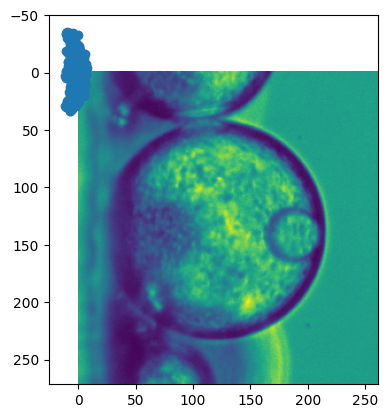

In [19]:
plt.imshow(img)
plt.scatter(traj.x, traj.y)


All my csv data x, y are in pixels and need to be converted to microns.

In [57]:
for i in log.index:
    if i > 160:
        traj_file = os.path.join(traj_folder, "{:2d}.csv".format(i))
        if os.path.exists(traj_file):
            traj = pd.read_csv(traj_file)
            

            info = log.loc[i]
            mpp = info.MPP
            fps = info.FPS
            OD = info.OD
            ro = info["D"] / 2
            ri = info["d"] / 2

            X = traj.x.values * mpp
            Y = traj.y.values * mpp

            data = {"X": X, "Y": Y, "fps": fps, "OD": OD, "ro": ro, "ri": ri}
            savemat(os.path.join(traj_folder, "{:2d}.mat".format(i)), data)


In [53]:
a = loadmat(os.path.join(traj_folder, "162.mat"))

In [56]:
a["X"].shape

(30000, 1)